In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

from scripts.models import CustomGNN
from scripts.environment import Environment

In [2]:
all_positions = []

for i in range(10):
    all_positions.append(np.load(f"positions/random_{i}_positions.npy"))

In [3]:

models = []
for i in range(1,9):
    model = CustomGNN(3, [8], 2, aggregation="mean", biases = True)
    model.load_state_dict(torch.load(f"models/model{i}.pth"))
    model.eval()
    models.append(model)

In [27]:
positions = all_positions[0]

X = torch.zeros(positions.shape[0], 2)


edges, edge_weights, border =  Environment.get_edges(positions)

innerouts = []
for model in models:
    minnerouts = []
    for i in range(int(1000/5)):
        XX = torch.cat((X, border.unsqueeze(1)), dim = 1)

        out, innerout = model.forward_verbose(XX, edges, edge_weights)
        minnerouts.append(innerout.detach().numpy())
        X = out
    innerouts.append(minnerouts)

innerouts = np.array(innerouts)
innerouts.shape

(1000, 8) (1000, 8)


(8, 200, 1000, 8)

(1000, 8)
(1000, 8)


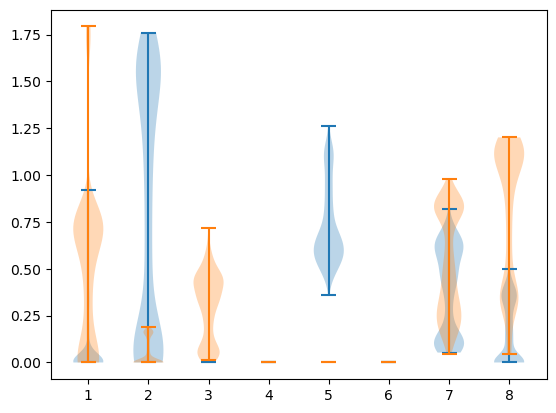

In [55]:
for m in [0,1]:
    xy = innerouts[m, -1,:,:]
    plt.violinplot(xy)
    print(xy.shape)

plt.show()


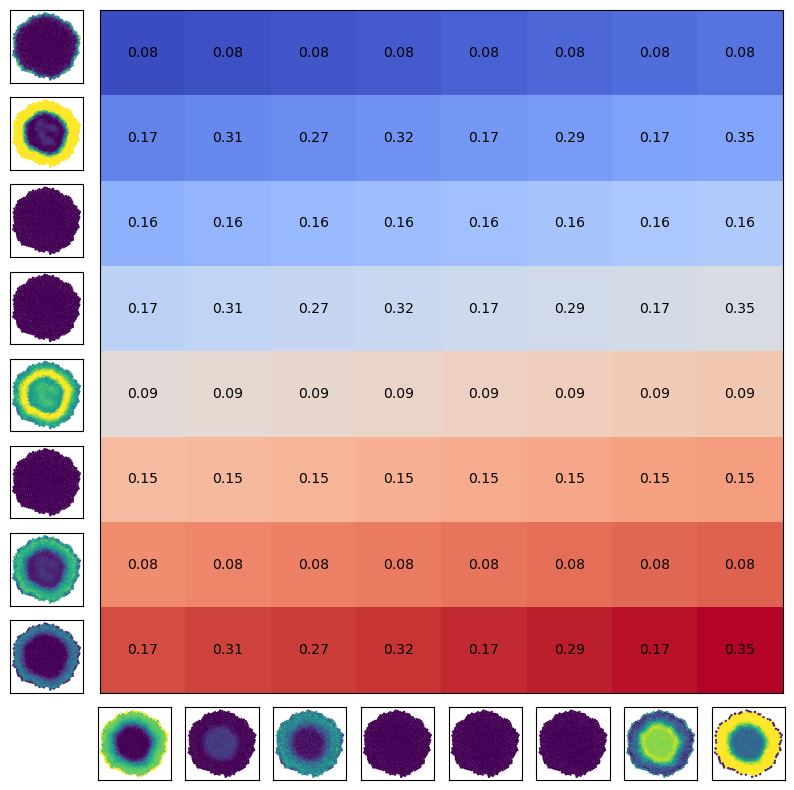

In [194]:
# make an 9x9 grid of axes
fig = plt.figure(figsize=(10,10))  
spec = fig.add_gridspec(9, 9)

for i in range(8):
    for m in [0,1]:
        xy = innerouts[m, -1,:,:]

        xx = i if m == 0 else 8
        yy = 0 if m == 0 else i+1
        ax = fig.add_subplot(spec[xx,yy])
        ax.scatter(positions[:,0], positions[:,1], c = xy[:,i], vmin = 0, vmax = 1., s = 0.7)
        ax.set_xticks([])
        ax.set_yticks([])
        # axs[i,m].set_title(f"Model {m} HL {i}")


d = innerouts[:2, -1,:,:]
np.moveaxis(d, 2, 1).shape
# shape (2, 8, 1000)
# make correlation matrix

correlations = np.zeros((8,8))
mags = np.zeros((8,8))
for i in range(8):
    for j in range(8):
        corr = np.dot(d[0,i,:], d[1,j,:])
        correlations[i,j] = i*10+j
        mags[i,j] = min(np.mean(np.abs(d[0,i,:])), np.mean(np.abs(d[1,j,:])))


upper = np.triu(correlations, k=0)
lower = np.tril(correlations, k=-1)

inner_ax = fig.add_subplot(spec[:-1,1:],) 

inner_ax.imshow(correlations, cmap = "coolwarm")

# plot the mags on the imshow
for i in range(8):
    for j in range(8):
        inner_ax.text(j, i, f"{mags[i,j]:.2f}", ha="center", va="center", color="black")


# plt.colorbar()  
inner_ax.set_xticks([])
inner_ax.set_yticks([])

# fig.tight_layout()

plt.show()

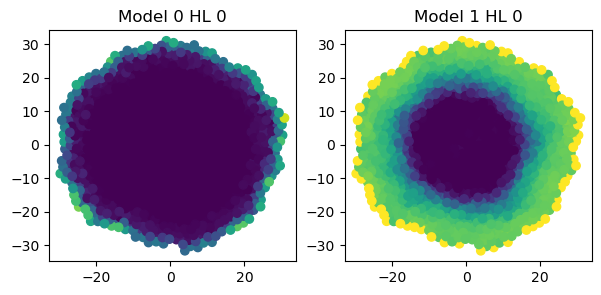

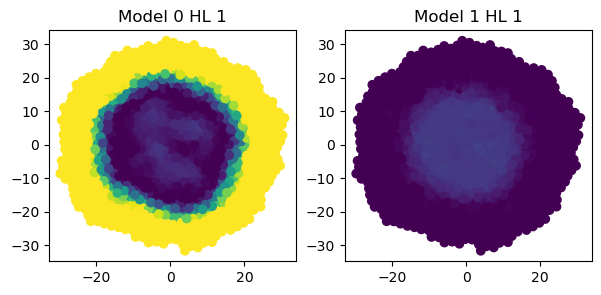

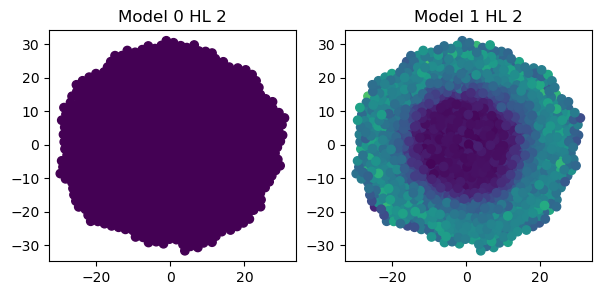

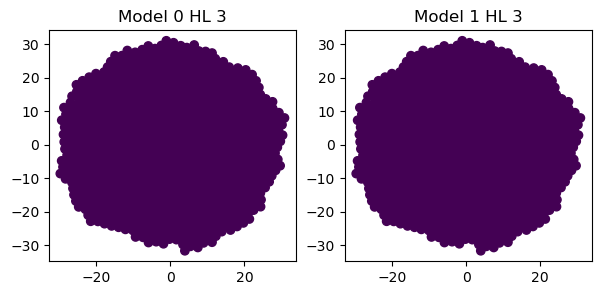

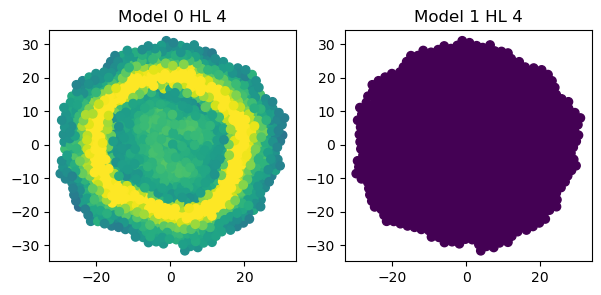

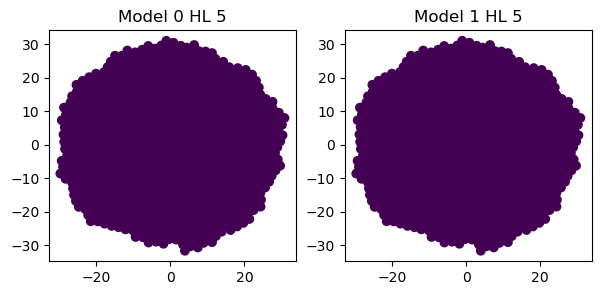

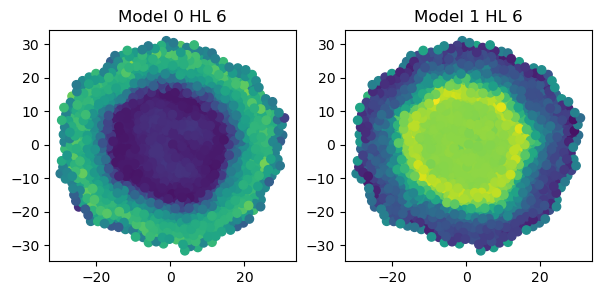

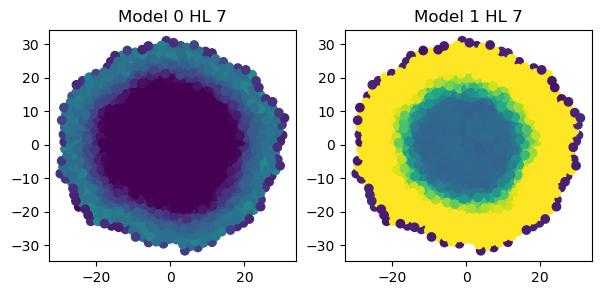

ModuleNotFoundError: No module named 'umap'